# Importing neccesary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Inspection and Transformation

In [3]:
df.shape

(38765, 3)

In [4]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\alito\AppData\Local\Temp\ipykernel_1512\936118274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


# Exploratory Data Analysis

In [7]:
print("Total number of different Customers: ",df["Member_number"].nunique())

Total number of different Customers:  3898


In [8]:
print("Total different Product category: ",df["itemDescription"].nunique())

Total different Product category:  167


In [9]:
print("Date range:",df["Date"].min(), "to", df['Date'].max())

Date range: 2014-01-01 00:00:00 to 2015-12-30 00:00:00


### Top 10 Products

In [10]:
top_10 = df["itemDescription"].value_counts().head(10).reset_index()

In [11]:
top_10.columns = ['item', 'count']

In [12]:
top_10

,item,count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


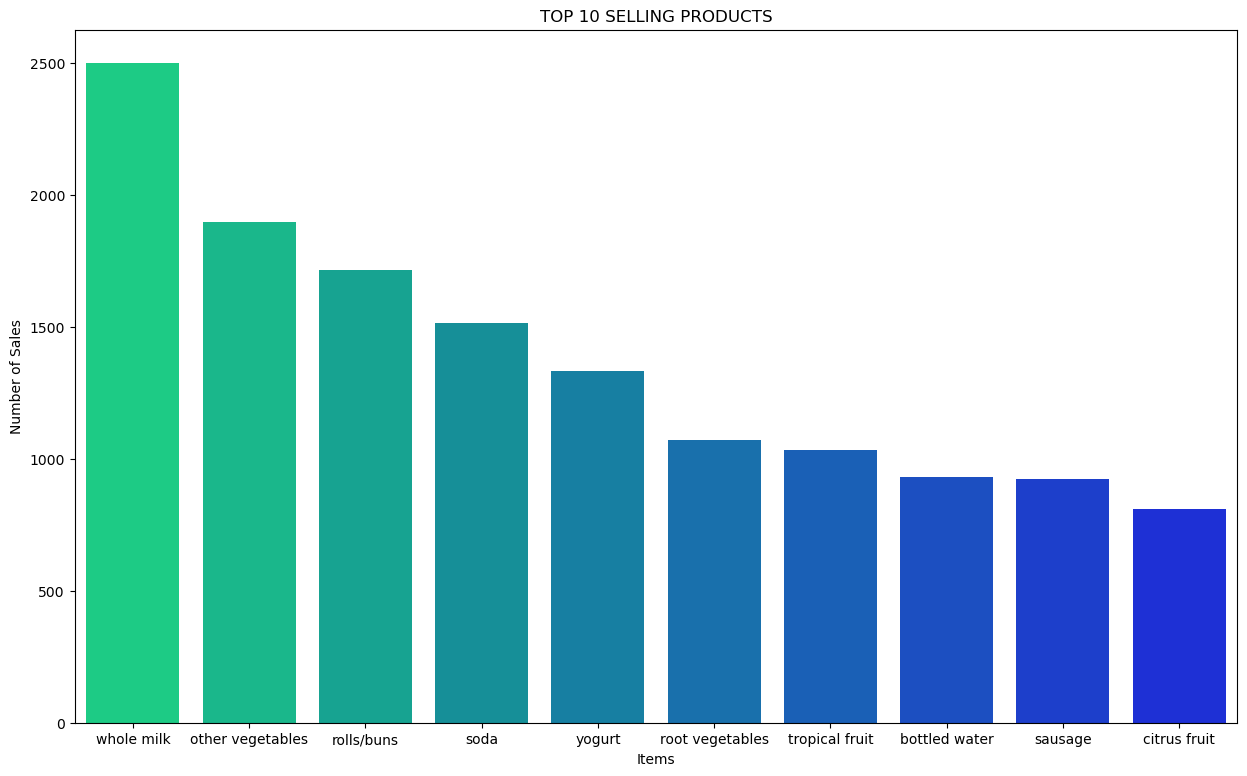

In [13]:
plt.figure(figsize=(15,9))
sns.barplot(data = top_10,x="item",y="count",palette="winter_r")
plt.title("TOP 10 SELLING PRODUCTS")
plt.xlabel("Items")
plt.ylabel("Number of Sales")
plt.savefig("images/top_10Products.png")
plt.show()

**Whole Milk is by far the most frequently purchased item suggesting it is a staple product.
Other popular items like vegetables, rolls, soda, yogurt and fruits indicate a typical basket includes a mix of daily essentials.
This aligns with expectations for a supermarket where customers often purchase dairy, drinks, vegetables, and fruits.**

### Items sold over time

In [14]:
sales = df.groupby("Date")["itemDescription"].count().reset_index()

In [15]:
sales.columns = ["Date","item"]

In [16]:
sales

,Date,item
0,2014-01-01,48
1,2014-01-02,55
2,2014-01-03,46
3,2014-01-04,39
4,2014-01-05,59
...,...,...
723,2015-12-26,37
724,2015-12-27,74
725,2015-12-28,58
726,2015-12-29,57


C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


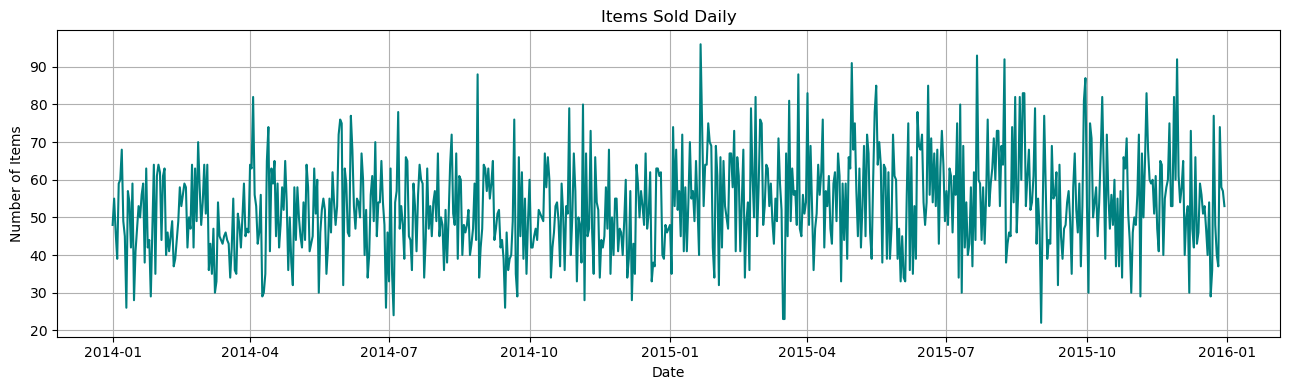

In [17]:
plt.figure(figsize=(13,4))
sns.lineplot(data = sales,x="Date",y="item",color = "teal")
plt.title("Items Sold Daily")
plt.xlabel("Date")
plt.ylabel("Number of Items")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/itemsSolddaily.png")
plt.show()

**Daily item sales mostly range between 40 to 70 items per day across the 2 year period. This indicates a fairly consistent customer base and purchasing behavior over time. 
There are noticeable spikes where item sales go above 80 or even 90, which might correspond to:
Weekends or end-of-month shopping. Special events, holidays, or promotions.**

**Several dips below 30 items suggest days of low activity, possibly due to:
Holidays (store closed). Data gaps (missing transaction records).
Seasonal inactivity.**

### Monthly Analysis

In [18]:
df["Month"] = df["Date"].dt.to_period('M')

In [19]:
monthly_sales = df.groupby("Month")["itemDescription"].count().reset_index()

In [20]:
monthly_sales

,Month,itemDescription
0,2014-01,1527
1,2014-02,1437
2,2014-03,1411
3,2014-04,1561
4,2014-05,1615
5,2014-06,1570
6,2014-07,1576
7,2014-08,1575
8,2014-09,1472
9,2014-10,1591


In [21]:
monthly_sales.columns = ["Month","Items"]

In [22]:
monthly_sales["Month"] = monthly_sales["Month"].dt.to_timestamp()

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


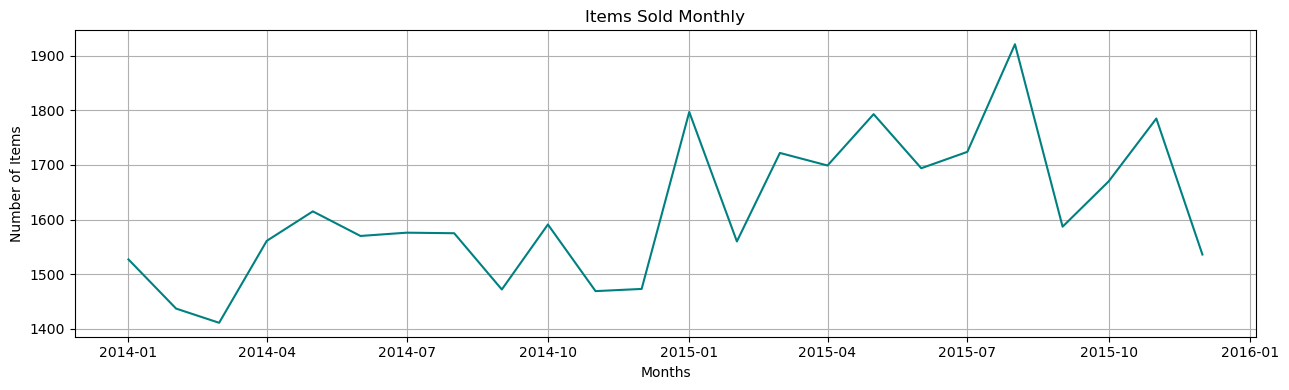

In [23]:
plt.figure(figsize=(13,4))
sns.lineplot(data = monthly_sales,x="Month",y="Items",color = "teal")
plt.title("Items Sold Monthly")
plt.xlabel("Months")
plt.ylabel("Number of Items")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/itemsSoldMonthly.png")
plt.show()

**Sales peak in August 2015, likely due to seasonal demand. December shows a dip, possibly from holidays or data gaps.**
**January 2015 sees a spike, likely post-holiday restocking. Mid-year sales (Mar–Jul) are stable, indicating steady demand.**
**Seasonal trends suggest planning promotions around August and January.**

### Basket Size Distribution

In [24]:
basket_sizes = df.groupby(["Member_number","Date"])["itemDescription"].count().reset_index()

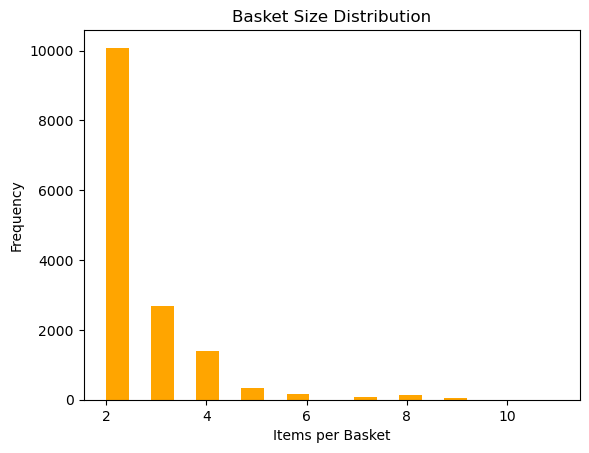

In [25]:
basket_sizes = df.groupby(['Member_number', 'Date'])['itemDescription'].count()
basket_sizes.plot(kind='hist', bins=20, title='Basket Size Distribution', color='orange')
plt.xlabel('Items per Basket')
plt.savefig("images/basket_size_distribution.png")
plt.show()

**Most baskets contain only 2 items with frequency over 10,000. A few baskets have 3–5 items and very few exceed that.**
**This suggests that shoppers mostly buy in small quantities making quick and frequent visits and also buying for immediate consumption rather than stockpiling.**

# Market Basket Analysis

In [26]:
transaction = df.groupby(["Member_number","Date"])["itemDescription"].apply(list).values.tolist()

In [27]:
# Convert to transaction format
from mlxtend.preprocessing import TransactionEncoder

In [28]:
te = TransactionEncoder()
te_new = te.fit_transform(transaction)

In [29]:
df_new = pd.DataFrame(te_new,columns=te.columns_)

In [30]:
df_new.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Apriori algorithm

In [31]:
from mlxtend.frequent_patterns import apriori

In [32]:
frequent_items = apriori(df_new,min_support = 0.005,use_colnames = True)

In [33]:
frequent_items

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(whole milk, soda)"
122,0.005814,"(yogurt, soda)"
123,0.008220,"(whole milk, tropical fruit)"
124,0.005213,"(yogurt, tropical fruit)"


In [34]:
frequent_items.sort_values(by="support",ascending=False).head()

,support,itemsets
87,0.157923,(whole milk)
53,0.122101,(other vegetables)
66,0.110005,(rolls/buns)
75,0.097106,(soda)
88,0.085879,(yogurt)


### Association Rule

In [35]:
from mlxtend.frequent_patterns import association_rules

In [36]:
asso_rule = association_rules(frequent_items,metric="confidence",min_threshold=0.1)

In [37]:
asso_rule = asso_rule.sort_values(by="confidence",ascending=False)

In [40]:
# Top Rules
asso_rule[["antecedents","consequents","support","confidence","lift"]].head(10)

,antecedents,consequents,support,confidence,lift
0,(bottled beer),(whole milk),0.007151,0.157817,0.999330
14,(sausage),(whole milk),0.008955,0.148394,0.939663
7,(newspapers),(whole milk),0.005614,0.144330,0.913926
4,(domestic eggs),(whole milk),0.005280,0.142342,0.901341
6,(frankfurter),(whole milk),0.005280,0.139823,0.885388
5,(frankfurter),(other vegetables),0.005146,0.136283,1.116150
11,(pork),(whole milk),0.005012,0.135135,0.855703
10,(pip fruit),(whole milk),0.006616,0.134877,0.854071
3,(citrus fruit),(whole milk),0.007151,0.134591,0.852259
15,(shopping bags),(whole milk),0.006349,0.133427,0.844887


C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

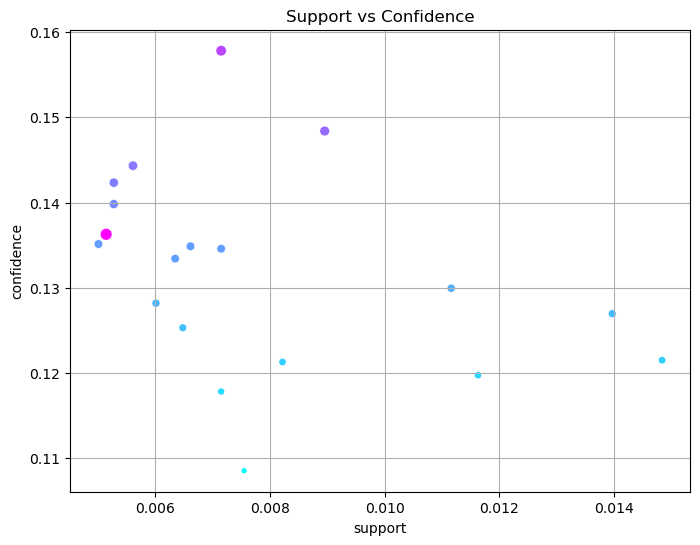

In [41]:
# Visulaizing Rules
plt.figure(figsize=(8, 6))
sns.scatterplot(data=asso_rule,x='support',y='confidence',size='lift',hue='lift',palette='cool',legend=False)
plt.title('Support vs Confidence')
plt.grid(True)
plt.savefig("images/supportVSconfidence.png")
plt.show()

**Most high-confidence rules point to “whole milk” as the consequent.
Customers buying various items (e.g., beer, sausage, eggs) are frequently also buying whole milk, indicating it's a common staple item and good for cross-promotions.**

**High Confidence But Low Support:
Top rules have confidence > 13% but support mostly < 1%, means they have strong associations but apply to relatively fewer transactions.
Useful for targeted marketing, not broad campaigns.**

**Lift Values ≈ 0.85 – 1.11:
Lift < 1 for most rules → the item combinations occur less often than expected by chance.**

**Only one rule stands out with lift > 1:
{frankfurter} → {other vegetables} → lift = 1.116
Indicates a positive association worth exploring for bundle offers.**

***Recommend whole milk when users add sausage, eggs, or newspapers to cart.
Create combo offers: “Buy 2: eggs + sausage → get discount on milk”
Promote vegetable + meat bundles due to {frankfurter → other vegetables} association.***
